In [44]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import acquire
import prepare
import unicodedata
import json
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
random_state = 42

from wordcloud import WordCloud, ImageColorGenerator

In [45]:
df = pd.read_json('../data.json')
df = df.rename(columns={'readme_contents':'original'})
df = prepare.nlp_prep(df)

In [ ]:
df

In [57]:
df.language.isnull().sum()

12

In [60]:
# rows 35 103 107 108 

In [63]:
df.tail(6)

,repo,language,original,clean,stemmed,lemmatized
103,godaddy/godaddy.github.io,HTML,,,,
104,cloudflare/cloudflare.github.io,CSS,"cloudflare.github.io\n====================\n\nThe source code of https://cloudflare.github.io/\n\nLICENSE\n-------\n\nCopyright 2013 CloudFlare, Inc.\n\nLicensed under the Apache License, Version 2.0: https://www.apache.org/licenses/LICENSE-2.0\n",cloudflaregithubio source code httpscloudflaregithubio license copyright 2013 cloudflare inc licensed apache license version 20 httpswwwapacheorglicenseslicense20,cloudflaregithubio sourc code httpscloudflaregithubio licens copyright 2013 cloudflar inc licens apach licens version 20 httpswwwapacheorglicenseslicense20,cloudflaregithubio source code httpscloudflaregithubio license copyright 2013 cloudflare inc licensed apache license version 20 httpswwwapacheorglicenseslicense20
105,eleme/eleme.github.io,CSS,"# Team Blog\n\nRequirements to join this blog:\n\n1. Must be a developer in Eleme\n2. Add your information in `_data/members.yml`\n\n## Preview\n\nThis blog is powered by Jekyll. If you want a preview on your local machine,\nyou need to install Jekyll yourself.\n",team blog requirements join blog 1 must developer eleme 2 add information datamembersyml preview blog powered jekyll want preview local machine need install jekyll,team blog requir join blog 1 must develop elem 2 add inform datamembersyml preview blog power jekyl want preview local machin need instal jekyl,team blog requirement join blog 1 must developer eleme 2 add information datamembersyml preview blog powered jekyll want preview local machine need install jekyll
106,didi/didi.github.io,HTML,# didi.github.io\ndidi website\n,didigithubio didi website,didigithubio didi websit,didigithubio didi website
107,alibaba/alibaba.github.com,CSS,,,,
108,google/google.github.io,HTML,,,,


In [ ]:
df[df.original == '']

In [65]:
df[df.language.isna()]

repo language  \
6             felipefialho/frontend-challenges     None   
8                        florinpop17/app-ideas     None   
21               ACM-Alexandria-SC/Internships     None   
36                      onceupon/Bash-Oneliner     None   
75                       datasciencemasters/go     None   
76  practical-tutorials/project-based-learning     None   
77        zhiwehu/Python-programming-exercises     None   
78               MunGell/awesome-for-beginners     None   
79                  appacademy/welcome-to-open     None   
84                              karan/Projects     None   
85                        sindresorhus/awesome     None   
87            codecrafters-io/build-your-own-x     None   

                                             original  \
6   <p align="center"><img src="https://user-image...   
8   ## :ledger: App Ideas Collection\n\n![App Idea...   
21  \n\n\n\n# Summer 2022 Tech Internships for Egy...   
36  # Bash-Oneliner\nI am glad that you are here! ...   
75  _created & maintained by [@clarecorthell](http...   
76  # Project Based Learning\n\n[![Gitter](https:/...   
77  # Python-programming-exercises\n\n100+ Python ...   
78  [![Doppler](assets/doppler.png)](https://www.d...   
79  # Welcome to a/A Open\n\n![](open-image.png)\n...   
84  Mega Project List\r\n========\r\n\r\nA list of...   
85  <div align="center">\n\t<a href="https://vshym...   
87  **[[Submit tutorial](https://github.com/danist...   

                                                clean  \
6   p aligncenterimg srchttpsuserimagesgithubuserc...   
8   ledger app ideas collection app ideas imageapp...   
21  summer 2022 tech internships egyptian students...   
36  bashoneliner glad working bioinformatics years...   
75  created maintained clarecorthellhttpbitlyclare...   
76  project based learning gitterhttpsbadgesgitter...   
77  pythonprogrammingexercises 100 python challeng...   
78  dopplerassetsdopplerpnghttpswwwdopplercomutmca...   
79  welcome aa open openimagepng tldr click learn ...   
84  mega project list list practical projects anyo...   
85  div aligncenter &#9; hrefhttpsvshymanskyygithu...   
87  submit tutorialhttpsgithubcomdanistefanovicbui...   

                                              stemmed  \
6   p aligncenterimg srchttpsuserimagesgithubuserc...   
8   ledger app idea collect app idea imageappideas...   
21  summer 2022 tech internship egyptian student c...   
36  bashonelin glad work bioinformat year ago amaz...   
75  creat maintain clarecorthellhttpbitlyclarecort...   
76  project base learn gitterhttpsbadgesgitterimpr...   
77  pythonprogrammingexercis 100 python challeng p...   
78  dopplerassetsdopplerpnghttpswwwdopplercomutmca...   
79  welcom aa open openimagepng tldr click learn c...   
84  mega project list list practic project anyon s...   
85  div aligncent &#9; hrefhttpsvshymanskyygithubi...   
87  submit tutorialhttpsgithubcomdanistefanovicbui...   

                                           lemmatized  
6   p aligncenterimg srchttpsuserimagesgithubuserc...  
8   ledger app idea collection app idea imageappid...  
21  summer 2022 tech internship egyptian student c...  
36  bashoneliner glad working bioinformatics year ...  
75  created maintained clarecorthellhttpbitlyclare...  
76  project based learning gitterhttpsbadgesgitter...  
77  pythonprogrammingexercises 100 python challeng...  
78  dopplerassetsdopplerpnghttpswwwdopplercomutmca...  
79  welcome aa open openimagepng tldr click learn ...  
84  mega project list list practical project anyon...  
85  div aligncenter &#9; hrefhttpsvshymanskyygithu...  
87  submit tutorialhttpsgithubcomdanistefanovicbui...

Outcomes are essentially the same, so there is no reason to use my version in favor of what is already in the prepare file. 

In [28]:
def get_word_counts_series(df, column):
    '''
    This function takes in a dataframe
    and the column you want to create the word counts of
    returns a series of the words and their counts
    '''
    words = ' '.join(df[column])
    
    words_list = words.split()
    
    word_counts = pd.Series(words_list).value_counts()
    
    return word_counts

In [29]:
get_word_counts_series(df2, 'readme_contents')

|             12075
-              3624
*              2870
the            2704
and            2452
              ...  
DKIM              1
languages!        1
attacks           1
injection         1
didi              1
Length: 35630, dtype: int64

In [35]:
def bigram_count_word_cloud(words_list, top_num = 20, title_name = None):
    '''
    This function takes in a words_list
    Creates bigrams
    Plots the counts on a bar chart and a wordcloud 
    Optional arguements to change customization
    - top_num: default 20, shows most common number of bigrams
    '''

    # create bigrams
    ngrams = pd.Series(nltk.bigrams(words_list)).value_counts().head(top_num)
    
    # set up figuresize
    plt.figure(figsize = (20, top_num/2.5))
    
    # plot bigrams on left subplot
    plt.subplot(1, 2, 1)
    ngrams.sort_values(ascending = True).plot.barh(color = '#29af7f', alpha = .7, width = .9)
    plt.title(f'Top {top_num} Bigrams: {title_name}')
    
    # create dictionary of words from the bigrams
    data = {k[0] + ' ' + k[1]: v for k, v in ngrams.to_dict().items()}
    
    # create wordcloud image
    img = WordCloud(background_color='white', width=400, height=400).generate_from_frequencies(data)
    
    # plot worcloud on right subplot
    plt.subplot(1, 2, 2)
    # show image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Word Cloud", font = 'Arial', fontsize= 20)
    plt.show()

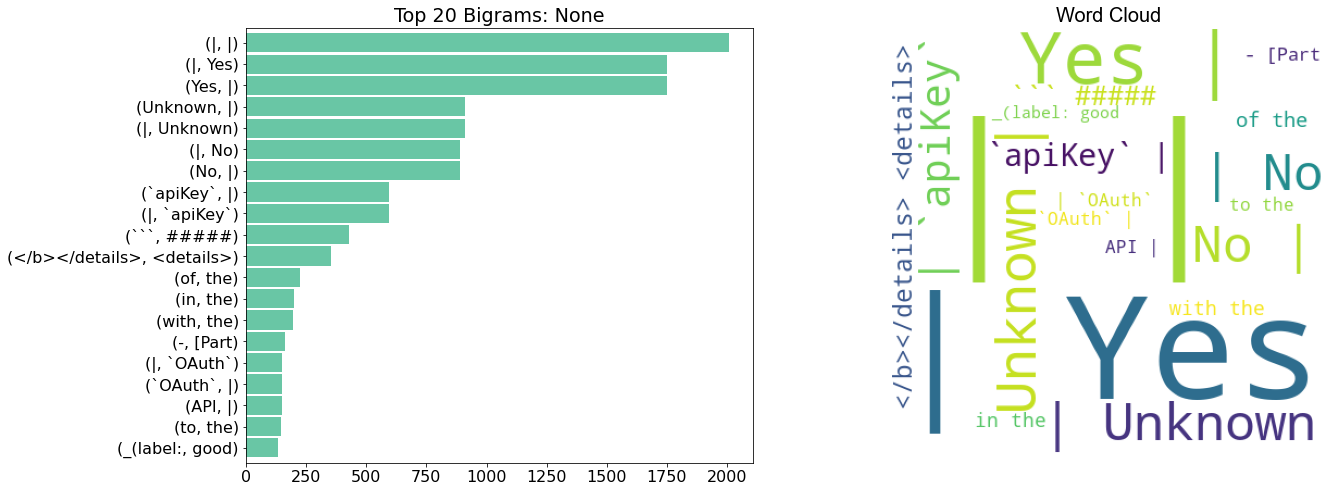

In [40]:
bigram_count_word_cloud(words_list)